In [16]:
from poincare_maps import *
# from analysis import *

import scanpy.api as sc
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import *

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics.pairwise import pairwise_distances

def pseudtotime_comparison(adata, col_names, n_branchings=2):
    sc.tl.dpt(adata, n_branchings=n_branchings)
    diffpt = np.array(adata.obs['dpt_pseudotime'])
    diffpt[diffpt == np.inf] = 1.2
    model.plot('rot', labels=np.array(adata.obs['dpt_groups']), 
           file_name=fout + '_dpt', title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8))
    
    real_time = np.zeros(len(true_lineages))
    for branch in np.unique(true_lineages):
        idx = np.where(true_lineages == branch)[0]
        real_time[idx] = idx - idx[0]

    model.plot_pseudotime(data, col_names, true_labels, file_name=fout + '_realtime', 
                          fs=8, idx=[], pm_pseudotime=real_time)
    
    model.plot_pseudotime(data, col_names, true_labels, file_name=fout + '_poincare', fs=8, idx=[], 
                          pm_pseudotime=model.distances[model.iroot])
    
    model.plot_pseudotime(data, col_names, true_labels, 
                          file_name=fout + '_diffuion', fs=8, idx=[], pm_pseudotime=diffpt)
    
    return real_time, diffpt, model.distances[model.iroot]

In [17]:
from tabulate import tabulate
table = [["name", "dpt", "pmpt", "dpt-pmpt"]]

... storing 'labels' as categorical


saving figure to file analysis/krumsiek11_blobs/paga.pdf


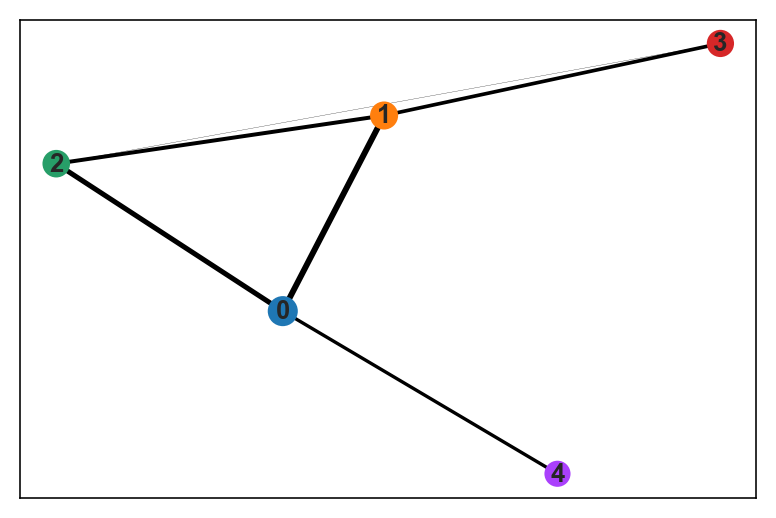

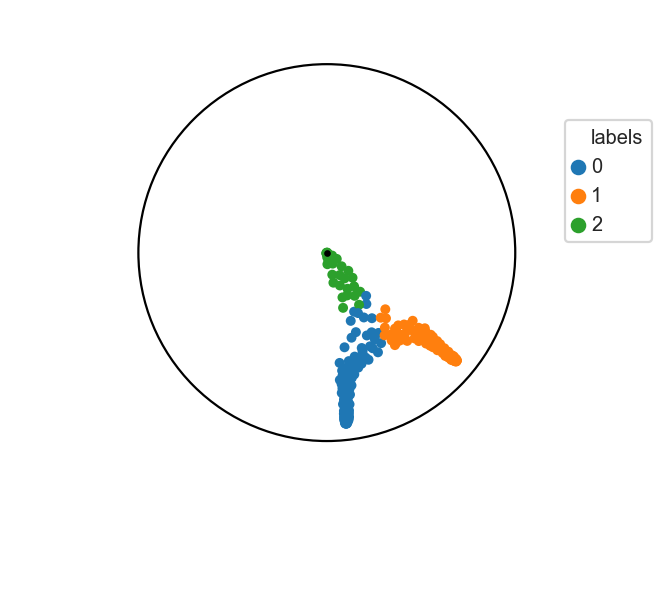

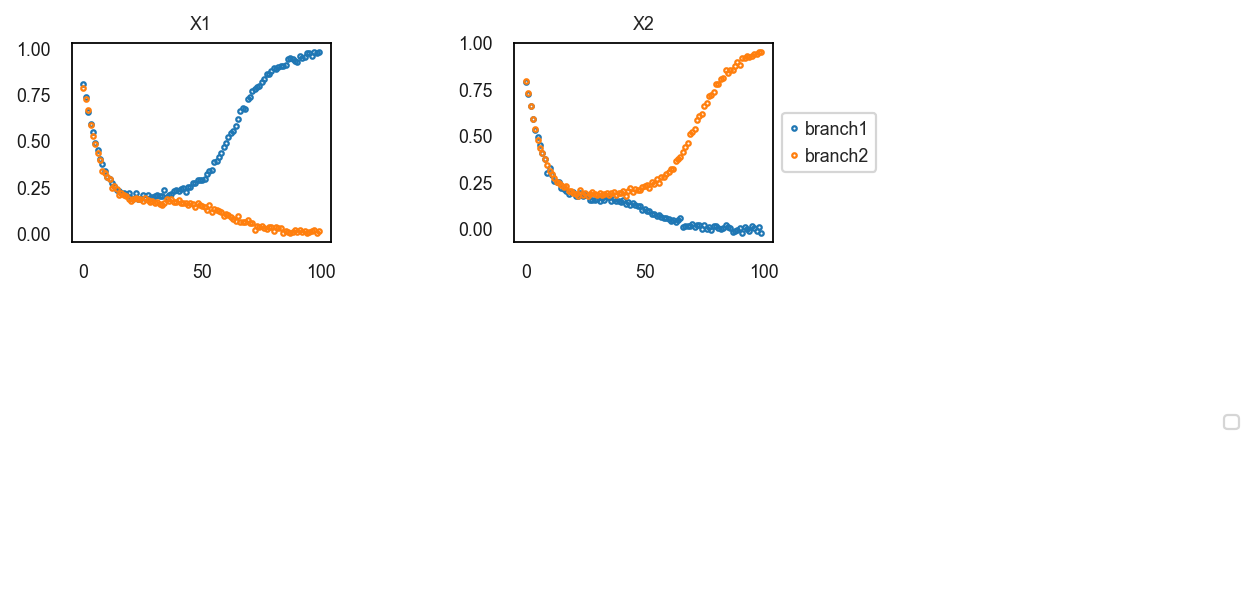

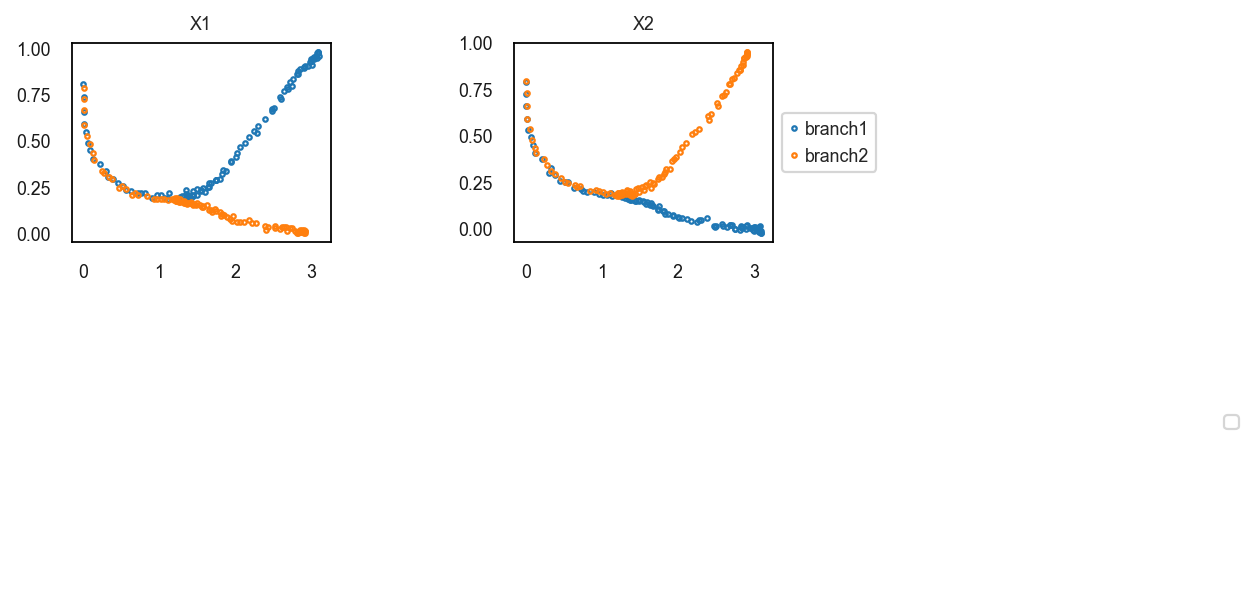

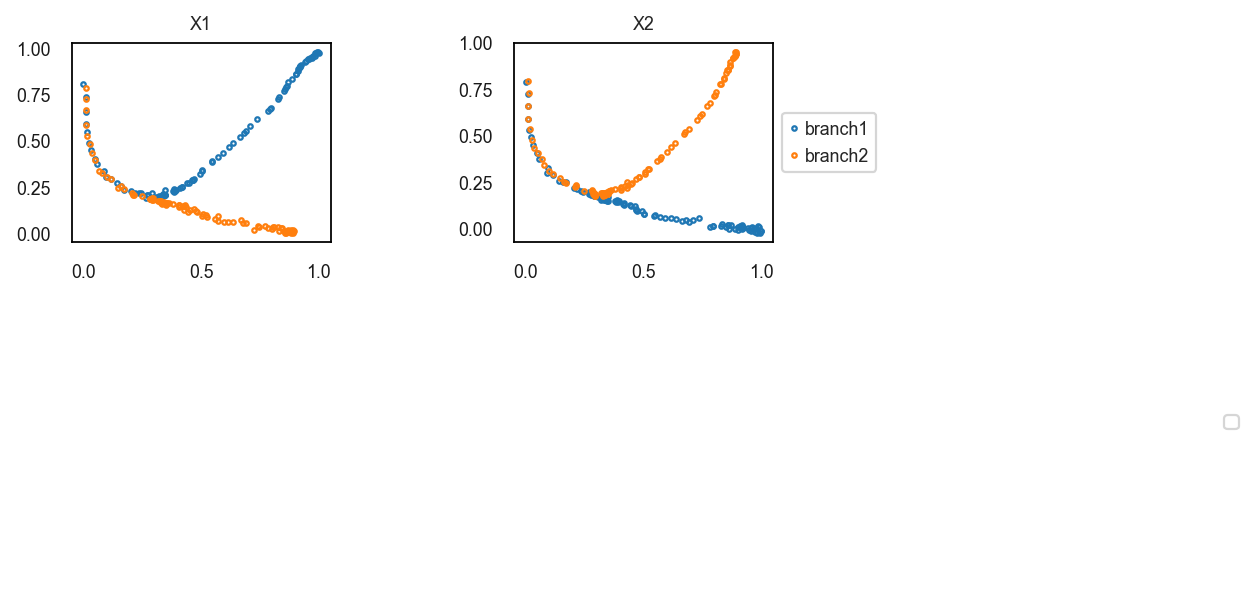

In [18]:
model_name = 'ToggleSwitch'
col_dict = None

fin = f"datasets/{model_name}"
fout = f"benchmarks/{model_name}"

data, true_labels, col_names = read_data(fin, normalize=False, n_pca=0)
adata, iroot, louvain_labels = init_scanpy(data, col_names, 'root', true_labels, fout, k=30, n_pcs=0)

true_lineages = true_labels
true_lineages[true_lineages == 'root'] = 'branch1'
true_lineages[true_lineages == 'inter1'] = 'branch1'
true_lineages[true_lineages == 'inter2'] = 'branch2'


fsetting = 'ToggleSwitch_MFIsym15_klSym_sigma=1.00_gamma=2.00_lr=0.02_lrm=1.00_pca=20_epochs=10000_batchsize=25_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model = PoincareMaps(poincare_coord)
model.iroot = iroot
model.rotate()
model.get_distances()

real_time_1, diffpt_1, pmpt_1 = pseudtotime_comparison(adata, col_names, n_branchings=1)

dpt-pmt: 0.99
pmt-real: 0.99
dpt-real: 0.99
dpt-pmt: 0.99
pmt-real: 0.98
dpt-real: 0.98


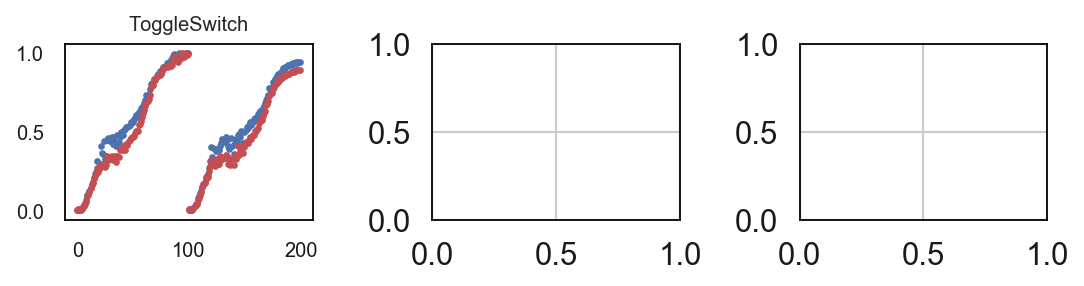

In [19]:
fs = 9
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(7, 2))
l = 0
c_pm_1 = []
c_dptpm_1 = []
c_dpt_1 = []

for branch in np.unique(true_lineages):
    if branch != 'blobs':
        idx = np.where(true_lineages == branch)
        axs[l].scatter(idx, pmpt_1[idx]/np.max(abs(pmpt_1)), c='b', s=4)
        axs[l].scatter(idx, diffpt_1[idx], c='r', s=4)
        
        c_dptpm = np.corrcoef(pmpt_1[idx]/np.max(abs(pmpt_1)), diffpt_1[idx]/np.max(abs(diffpt_1[idx])))[0,1]
        c_dpt = np.corrcoef(real_time_1[idx]/np.max(abs(real_time_1[idx])), diffpt_1[idx]/np.max(abs(diffpt_1[idx])))[0,1]
        c_pm = np.corrcoef(real_time_1[idx]/np.max(abs(real_time_1[idx])), pmpt_1[idx]/np.max(abs(pmpt_1[idx])))[0,1]
        
        table.append([f"{model_name}: {branch}", f"{c_dpt:.2f}", f"{c_pm:.2f}",
                  f"{c_dptpm:.2f}"])

        c_pm_1.append(c_pm)
        c_dpt_1.append(c_dpt)
        c_dptpm_1.append(c_dptpm)

        print(f"dpt-pmt: {c_dptpm:.2f}")
        print(f"pmt-real: {c_pm:.2f}")
        print(f"dpt-real: {c_dpt:.2f}")

axs[l].yaxis.set_tick_params(labelsize=9)
axs[l].xaxis.set_tick_params(labelsize=fs)
axs[l].set_title('ToggleSwitch', fontsize=fs)
axs[l].grid('off')
fig.tight_layout()

table.append([f"{model_name}: avg", f"{np.mean(c_dpt_1):.2f}", f"{np.mean(c_pm_1):.2f}",
                  f"{np.mean(c_dptpm_1):.2f}"])

                                                                  
fig.savefig('benchmarks/pseudotime.pdf', format='pdf')

... storing 'labels' as categorical


saving figure to file benchmarks/ToggleSwitch/paga.pdf


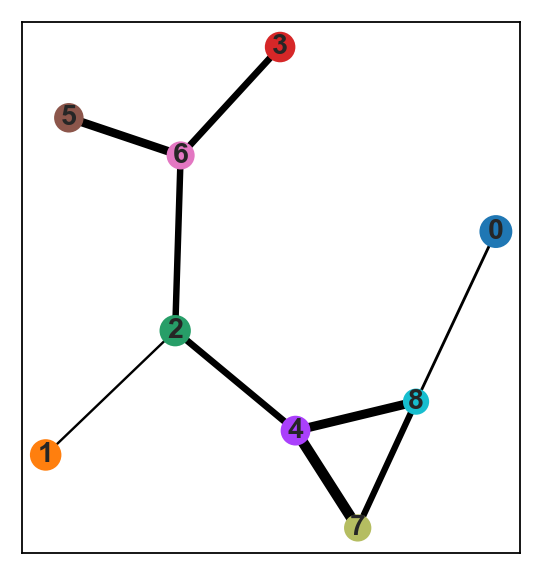

In [20]:
model_name = 'MyeloidProgenitors'
col_dict = {'branchNe': '#4292c6', 'neutrophil': '#08306b',
            'branchMo': '#9e9ac8', 'monocyte': '#54278f',
            'branchEr': '#fc9272', 'erythrocyt': '#cb181d',
            'megakaryoc': '#006d2c',  'branchMe': '#74c476',
            'proghead': '#525252', 'root': '#000000',
           'interpolation': '#bdbdbd'}

fin = f"datasets/{model_name}"
fout = f"benchmarks/{model_name}"

data, true_labels, col_names = read_data(fin, normalize=False, n_pca=0)
true_labels[true_labels == 'branchMo'] = 'monocyte'
true_labels[true_labels == 'branchEr'] = 'erythrocyt'
true_labels[true_labels == 'branchMe'] = 'megakaryoc'
true_labels[true_labels == 'branchNe'] = 'neutrophil'

adata, iroot, louvain_labels = init_scanpy(data, col_names, 'root', true_labels, fout, k=30, n_pcs=0)
true_labels[true_labels == 'root'] = 'monocyte'
fsetting = 'MyeloidProgenitors_MFIsym30_klSym_sigma=2.00_gamma=2.00_lr=0.05_lrm=1.00_pca=0_epochs=10000_batchsize=80_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model = PoincareMaps(poincare_coord)
model.iroot = iroot
model.rotate()
model.get_distances()
true_lineages = true_labels

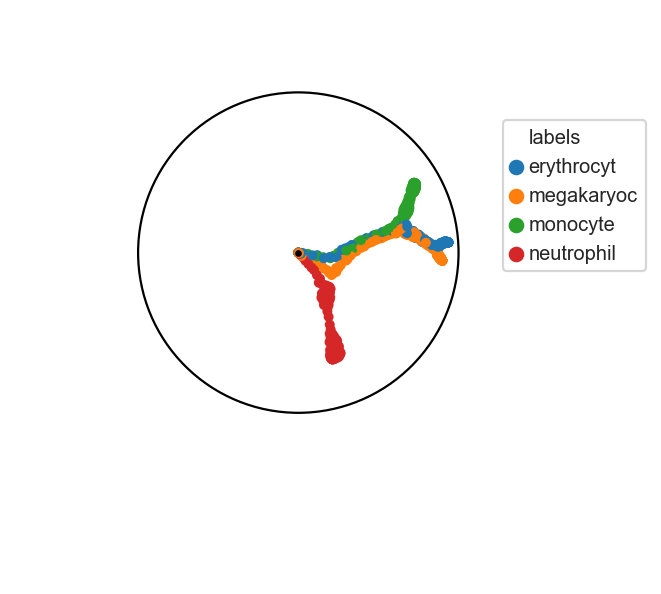

In [21]:
fs=9
model.plot('rot', labels=true_labels, file_name=fout + '_ori', 
           d1=4.5, d2=4.0,
           title_name='Poincaré map', zoom=None, bbox=(1.1, 0.8))

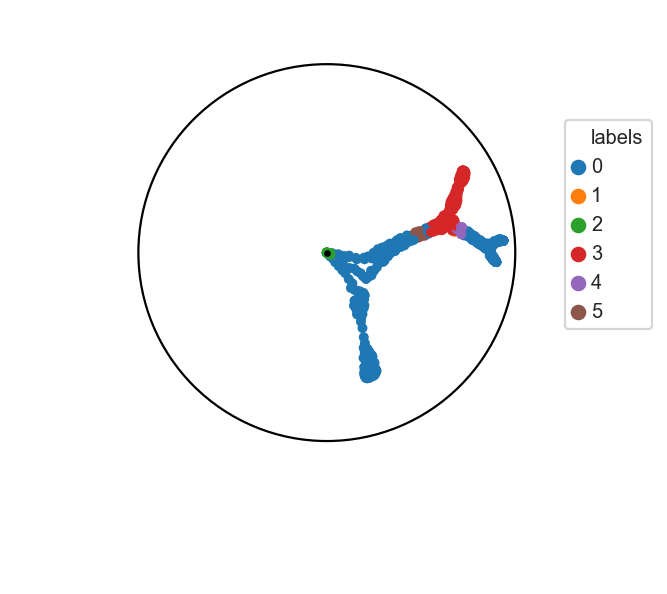

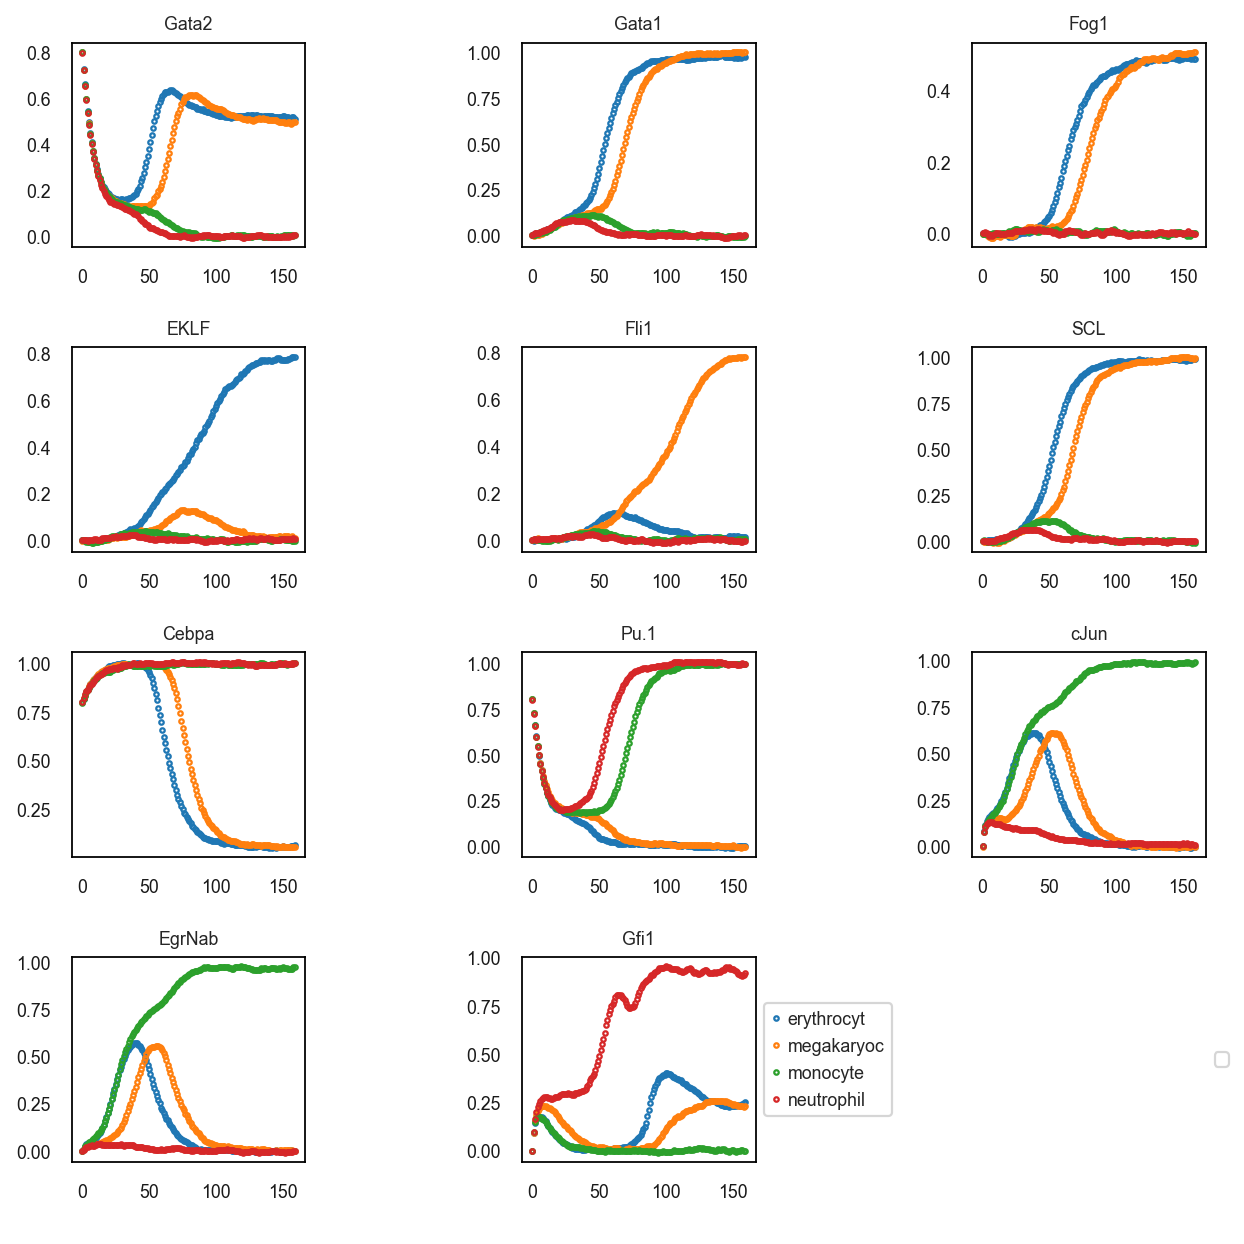

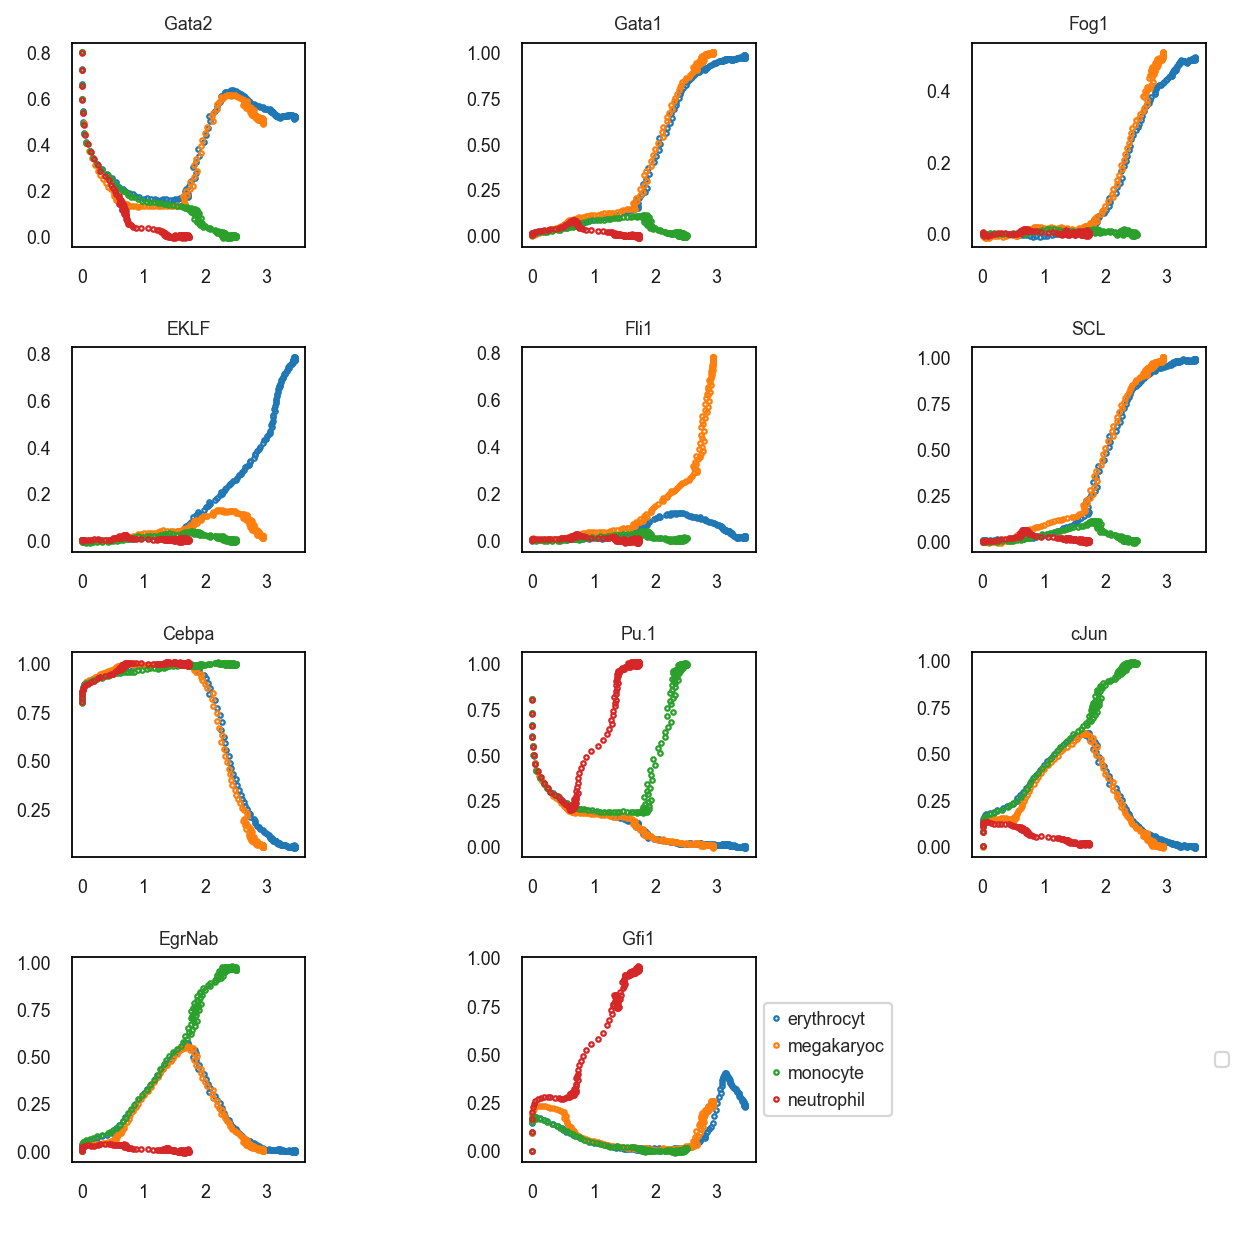

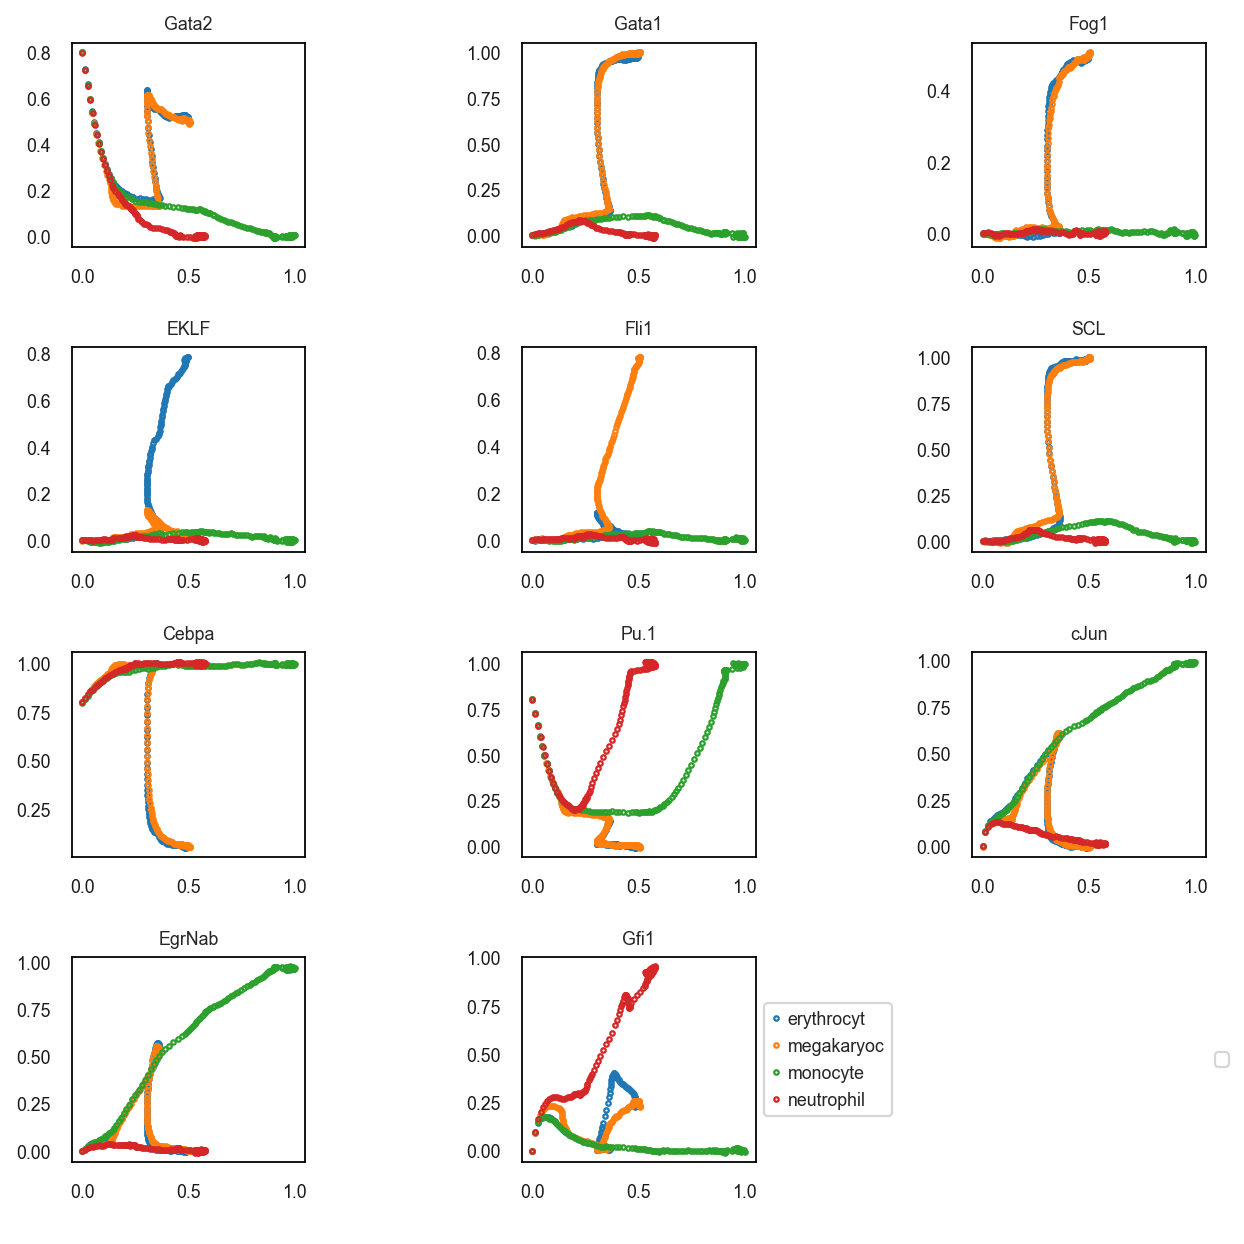

In [22]:
from scipy.stats import spearmanr
real_time_2, diffpt_2, pmpt_2 = pseudtotime_comparison(adata, col_names, n_branchings=2)


In [23]:
# fig = plt.figure(figsize=(3, 3))
# fig, axs = plt.subplots(1, 3, sharey=False, figsize=(7, 2))

l = 1
c_pm_2 = []
c_dptpm_2 = []
c_dpt_2 = []
for branch in np.unique(true_lineages):
    idx = np.where(true_lineages == branch)
    axs[l].scatter(idx, pmpt_2[idx], c='b', s=4)
    axs[l].scatter(idx, diffpt_2[idx], c='r', s=4)
    
    c_dptpm = np.corrcoef(pmpt_2[idx]/np.max(abs(pmpt_2[idx])), diffpt_2[idx]/np.max(abs(diffpt_2[idx])))[0,1]
    c_dpt = np.corrcoef(real_time_2[idx]/np.max(abs(real_time_2[idx])), diffpt_2[idx]/np.max(abs(diffpt_2[idx])))[0,1]
    c_pm = np.corrcoef(real_time_2[idx]/np.max(abs(real_time_2[idx])), pmpt_2[idx]/np.max(abs(pmpt_2[idx])))[0,1]

    table.append([f"{model_name}: {branch}", f"{c_dpt:.2f}", f"{c_pm:.2f}",
                  f"{c_dptpm:.2f}"])

    c_pm_2.append(c_pm)
    c_dpt_2.append(c_dpt)
    c_dptpm_2.append(c_dptpm)
        
    print(f"dpt-pmt: {c_dptpm:.2f}")
    print(f"pmt-real: {c_pm:.2f}")
    print(f"dpt-real: {c_dpt:.2f}")


axs[l].yaxis.set_tick_params(labelsize=9)
axs[l].xaxis.set_tick_params(labelsize=fs)
axs[l].set_title('Myeloid progenitors', fontsize=fs)
axs[l].grid('off')
fig.tight_layout()

table.append([f"{model_name}: avg", f"{np.mean(c_dpt_2):.2f}", f"{np.mean(c_pm_2):.2f}",
                  f"{np.mean(c_dptpm_2):.2f}"])

                                                                  
# l = 1
# for branch in np.unique(true_lineages):
#     if branch != 'blobs':
#         idx = np.where(true_lineages == branch)
# #         axs[l].scatter(np.array(idx), pmpt_2[idx], c='b', s=4)
#         axs[l].scatter(idx, np.gradient(pmpt_2[idx]))
# #         print(f"Poincaré = {spearmanr(idx, pmpt_2[idx]): .2f}")
# #         axs[l].scatter(idx, diffpt_2[idx], c='r', s=4)
# axs[l].yaxis.set_tick_params(labelsize=9)
# axs[l].xaxis.set_tick_params(labelsize=fs)
# axs[l].set_title('Myeloid progenitors', fontsize=fs)
# axs[l].grid('off')
# fig.tight_layout()

fig.savefig('benchmarks/pseudotime.pdf', format='pdf')


plt.savefig('benchmarks/pseudotime.pdf', format='pdf')
# plt.plot(model.distances[model.iroot])
# plt.plot(diffpt)


dpt-pmt: 0.91
pmt-real: 0.94
dpt-real: 0.89
dpt-pmt: 0.93
pmt-real: 0.95
dpt-real: 0.94
dpt-pmt: 0.97
pmt-real: 0.87
dpt-real: 0.93
dpt-pmt: 0.99
pmt-real: 0.91
dpt-real: 0.91


<Figure size 320x320 with 0 Axes>

In [24]:
np.unique(true_labels)

array(['erythrocyt', 'megakaryoc', 'monocyte', 'neutrophil'], dtype='<U10')

... storing 'labels' as categorical


saving figure to file benchmarks/MyeloidProgenitors/paga.pdf


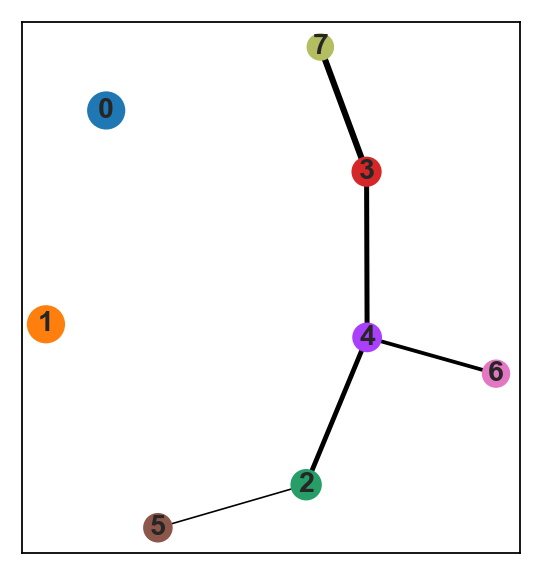

In [25]:
model_name = 'krumsiek11_blobs'
col_dict = None

fin = f"datasets/{model_name}"
fout = f"analysis/{model_name}"

data, true_labels, col_names = read_data(fin, normalize=False, n_pca=0)
true_lineages = true_labels
adata, iroot, louvain_labels = init_scanpy(data, col_names, 'root', true_labels, fout, k=30)

true_lineages[true_lineages == 'root'] = 'Mo'
true_lineages[true_lineages == 'progenitorMo'] = 'Mo'
true_lineages[true_lineages == 'progenitorEry'] = 'Ery'
true_lineages[true_lineages == 'progenitorMk'] = 'Mk'
true_lineages[true_lineages == 'progenitorNeu'] = 'Neu'


fsetting = 'krumsiek11_blobs_MFIsym30_klSym_sigma=1.00_gamma=2.00_lr=0.10_lrm=1.00_pca=0_epochs=10000_batchsize=160_connected'
input_file = f"results/{fsetting}"
poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
model = PoincareMaps(poincare_coord)
model.iroot = iroot
model.rotate()
model.get_distances()
# name_list, score_list_3 = run_comparison()

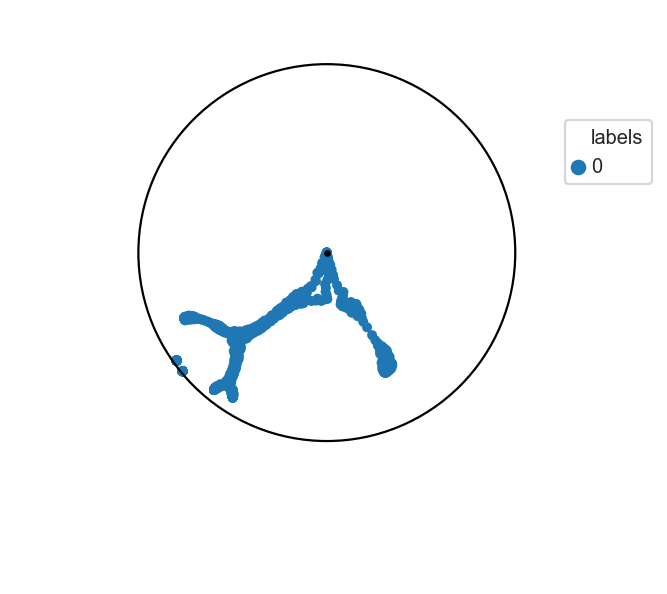

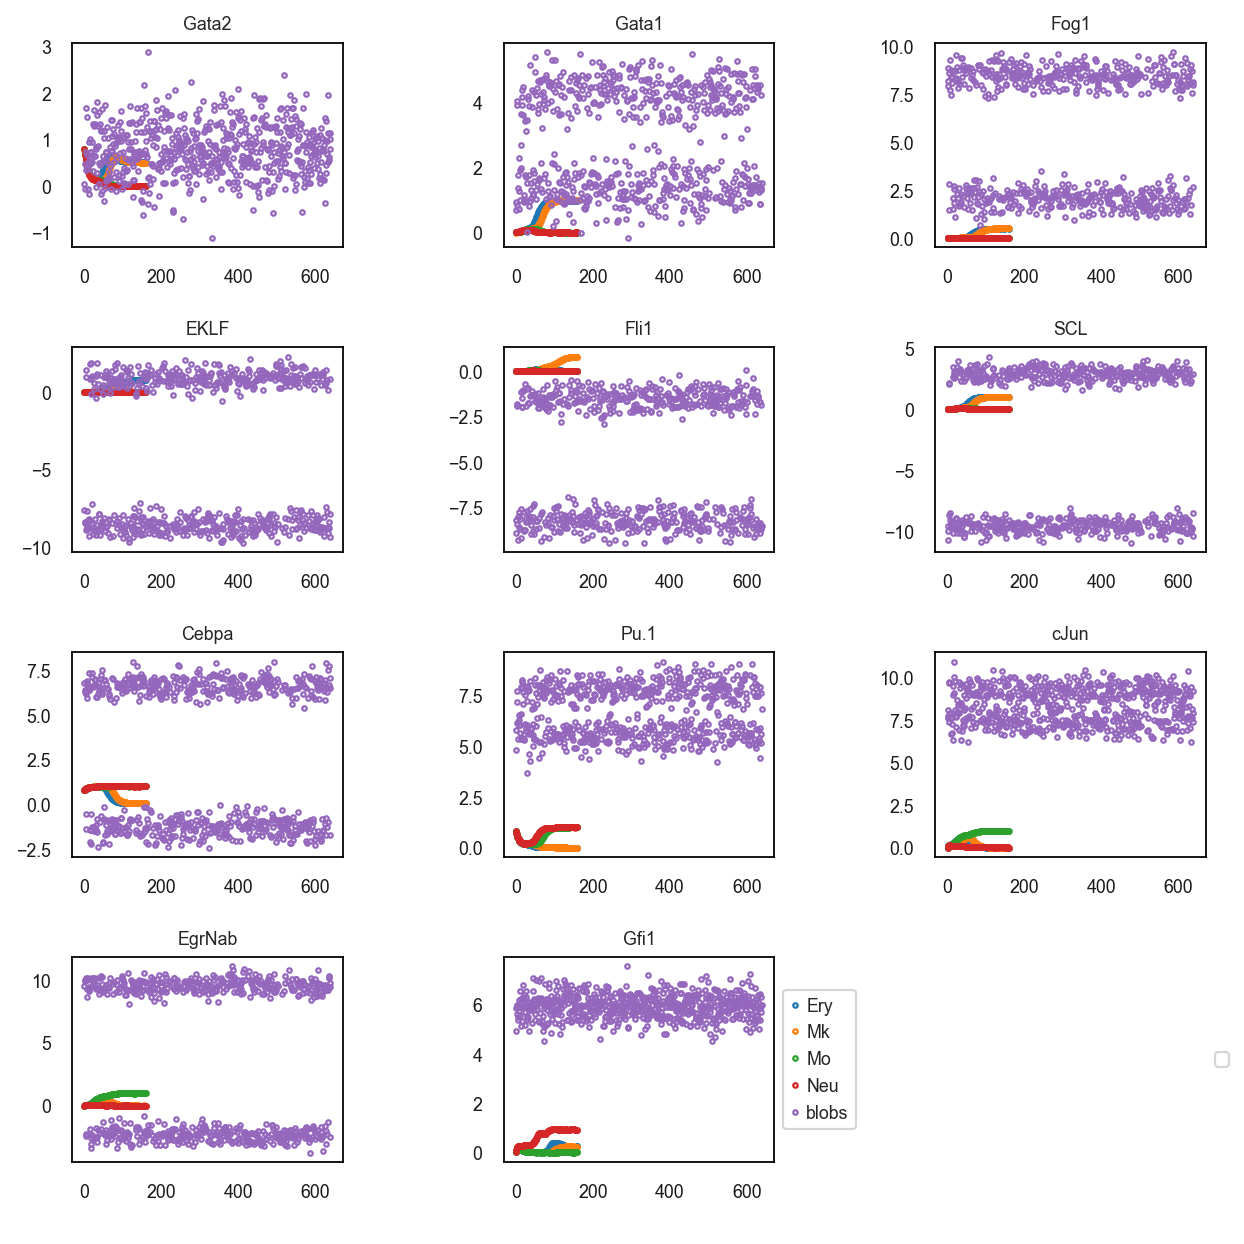

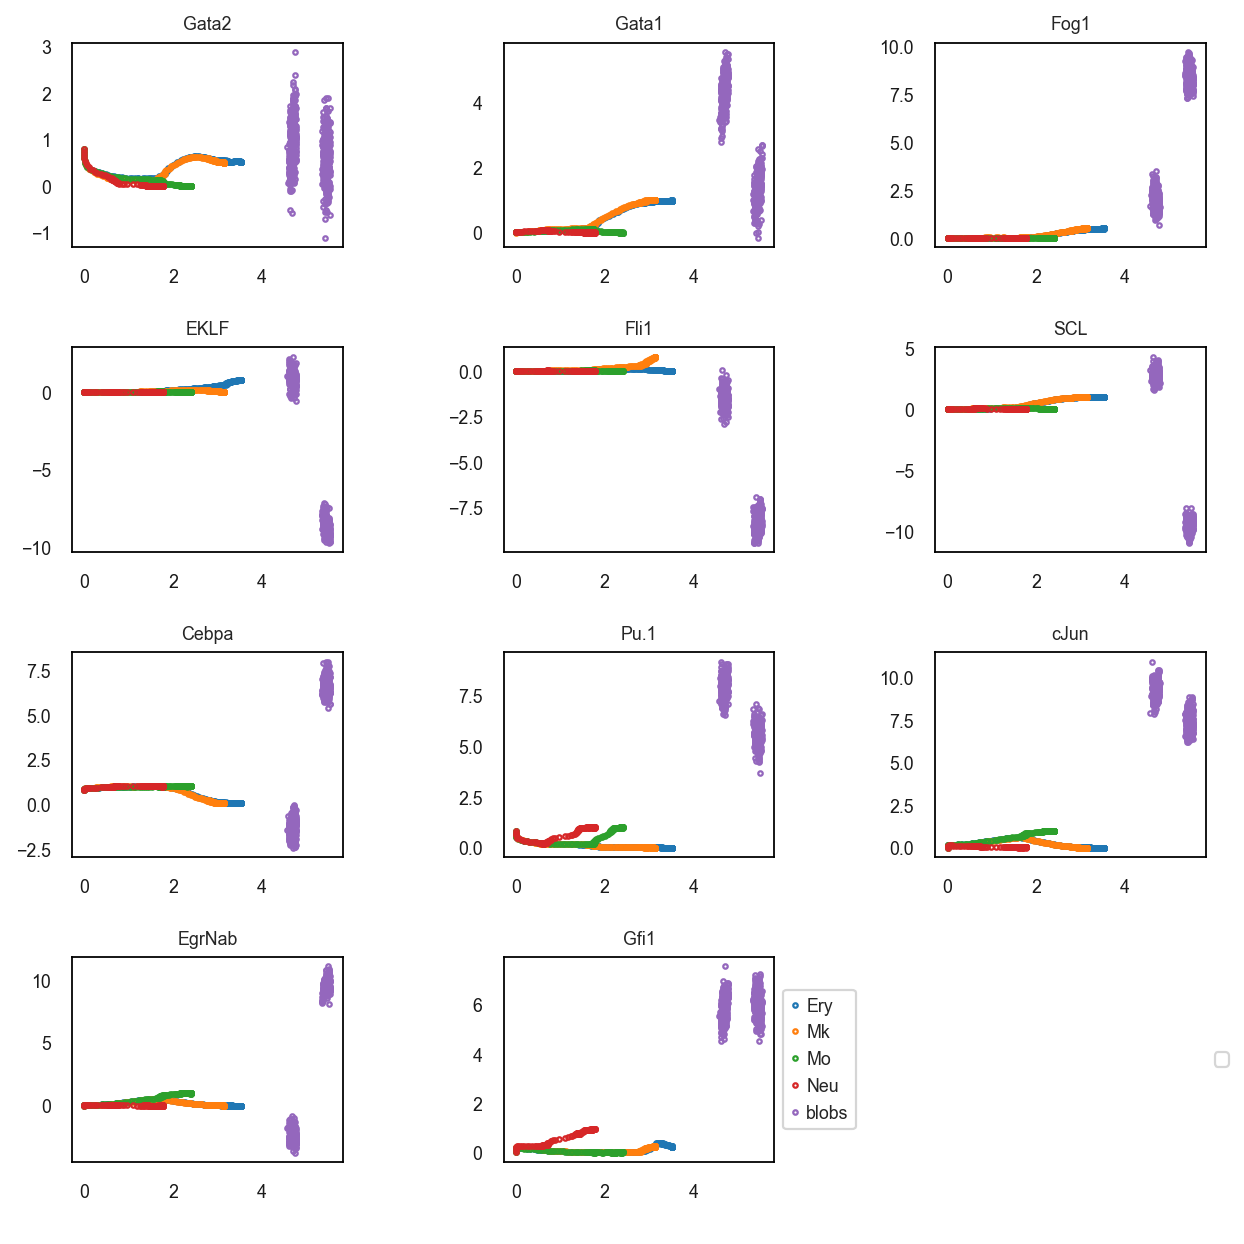

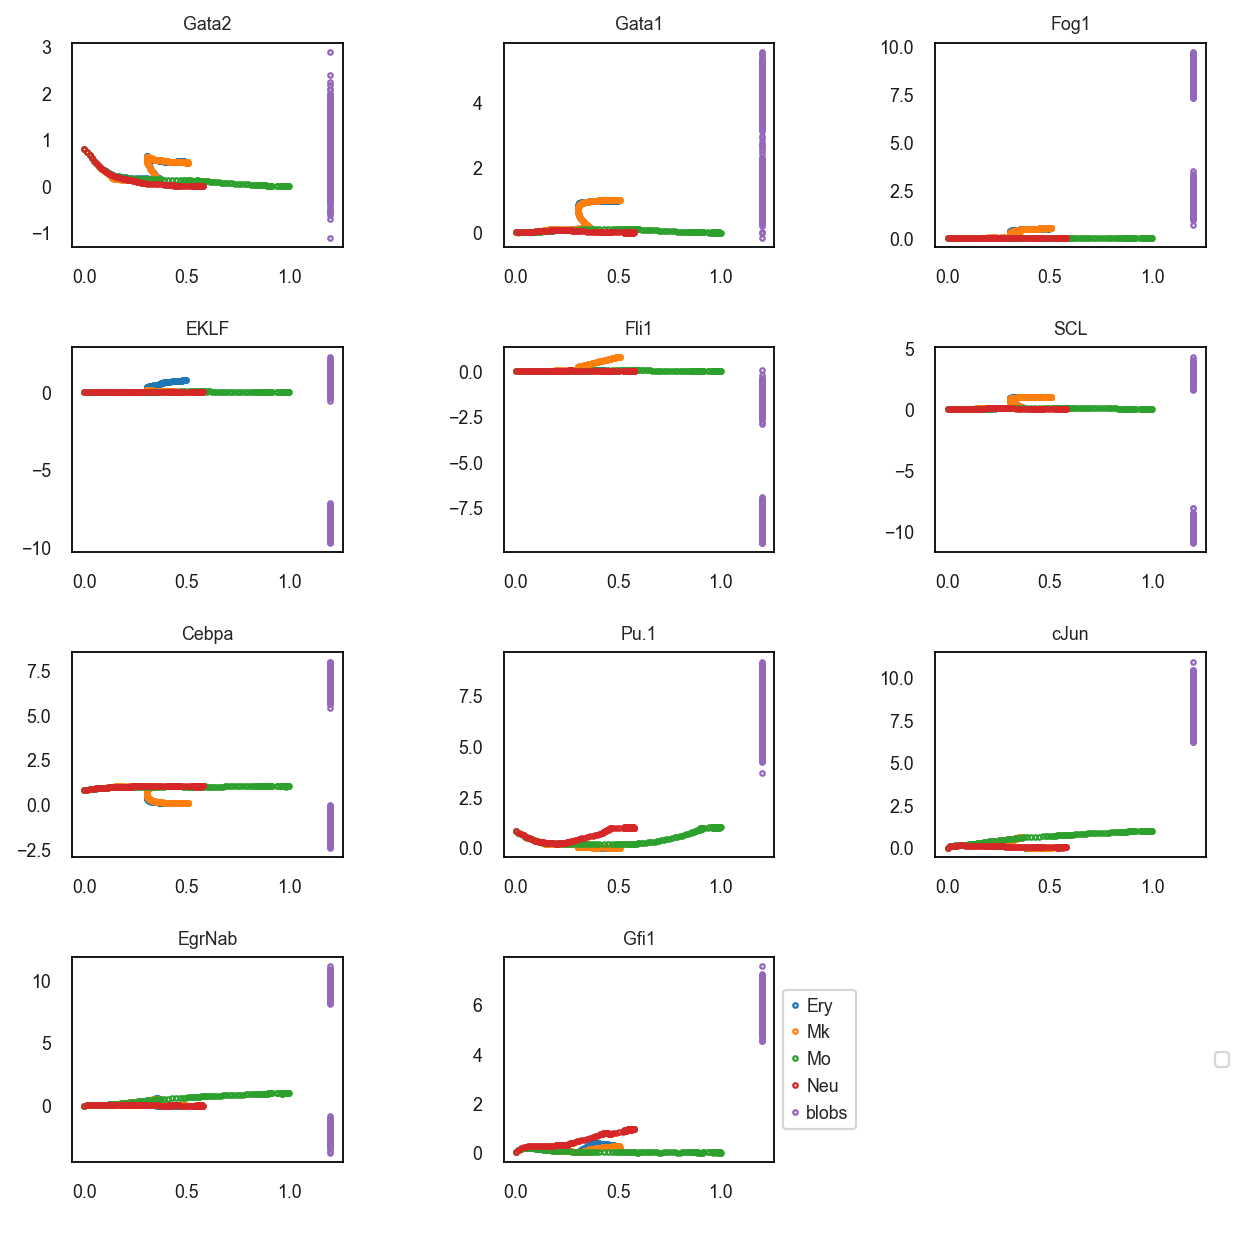

In [26]:
# fig = plt.figure(figsize=(3, 3))

real_time_3, diffpt_3, pmpt_3 = pseudtotime_comparison(adata, col_names, n_branchings=2)


In [27]:
l = 2
c_dpt_3 = []
c_dptpm_3 = []
c_pm_3 = []

for branch in np.unique(true_lineages):
    print(branch)
    if branch != 'blobs':
        idx = np.where(true_lineages == branch)
        axs[l].scatter(idx, pmpt_3[idx], c='b', s=4)
        axs[l].scatter(idx, diffpt_3[idx], c='r', s=4)
        
        c_dptpm = np.corrcoef(pmpt_3[idx]/np.max(abs(pmpt_3[idx])), diffpt_3[idx]/np.max(abs(diffpt_3[idx])))[0,1]
        c_dpt = np.corrcoef(real_time_3[idx]/np.max(abs(real_time_3[idx])), diffpt_3[idx]/np.max(abs(diffpt_3[idx])))[0,1]
        c_pm = np.corrcoef(real_time_3[idx]/np.max(abs(real_time_3[idx])), pmpt_3[idx]/np.max(abs(pmpt_3[idx])))[0,1]
        c_pm_3.append(c_pm)
        c_dpt_3.append(c_dpt)
        c_dptpm_3.append(c_dptpm)
        
        table.append([f"{model_name}: {branch}", f"{c_dpt:.2f}", f"{c_pm:.2f}",
                  f"{c_dptpm:.2f}"])

        
        print(f"dpt-pmt: {c_dptpm:.2f}")
        print(f"pmt-real: {c_pm:.2f}")
        print(f"dpt-real: {c_dpt:.2f}")

axs[l].yaxis.set_tick_params(labelsize=9)
axs[l].xaxis.set_tick_params(labelsize=fs)
axs[l].set_title('MP with blobs', fontsize=fs)
axs[l].grid('off')
fig.tight_layout()

print(f"dpt-pmt: {np.mean(c_dptpm_3):.2f}")
print(f"pmt-real: {np.mean(c_pm_3):.2f}")
print(f"dpt-real: {np.mean(c_dpt_3):.2f}")

table.append([f"{model_name}: avg", f"{np.mean(c_dpt_3):.2f}", f"{np.mean(c_pm_3):.2f}",
                  f"{np.mean(c_dptpm_3):.2f}"])

fig.savefig('benchmarks/pseudotime.pdf', format='pdf')
# plt.plot(model.distances[model.iroot])
# plt.plot(diffpt)


Ery
dpt-pmt: 0.90
pmt-real: 0.94
dpt-real: 0.89
Mk
dpt-pmt: 0.93
pmt-real: 0.96
dpt-real: 0.94
Mo
dpt-pmt: 0.97
pmt-real: 0.88
dpt-real: 0.93
Neu
dpt-pmt: 0.99
pmt-real: 0.91
dpt-real: 0.91
blobs
dpt-pmt: 0.95
pmt-real: 0.92
dpt-real: 0.92


In [28]:
print(tabulate(table, tablefmt="latex"))

\begin{tabular}{llll}
\hline
 name                           & dpt  & pmpt & dpt-pmpt \\
 ToggleSwitch: branch1          & 0.99 & 0.99 & 0.99     \\
 ToggleSwitch: branch2          & 0.98 & 0.98 & 0.99     \\
 ToggleSwitch: avg              & 0.99 & 0.98 & 0.99     \\
 MyeloidProgenitors: erythrocyt & 0.89 & 0.94 & 0.91     \\
 MyeloidProgenitors: megakaryoc & 0.94 & 0.95 & 0.93     \\
 MyeloidProgenitors: monocyte   & 0.93 & 0.87 & 0.97     \\
 MyeloidProgenitors: neutrophil & 0.91 & 0.91 & 0.99     \\
 MyeloidProgenitors: avg        & 0.92 & 0.92 & 0.95     \\
 krumsiek11\_blobs: Ery          & 0.89 & 0.94 & 0.90     \\
 krumsiek11\_blobs: Mk           & 0.94 & 0.96 & 0.93     \\
 krumsiek11\_blobs: Mo           & 0.93 & 0.88 & 0.97     \\
 krumsiek11\_blobs: Neu          & 0.91 & 0.91 & 0.99     \\
 krumsiek11\_blobs: avg          & 0.92 & 0.92 & 0.95     \\
\hline
\end{tabular}
